# **MLP Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

## **Importing data**

In Artificial Intelligence the modeling is the **creation, training, and deployment** of Machine Learning algorithms. The goal is to emulate logical decision-making based on the available data. 

In [70]:
# RUN ONLY FOR GOOGLE COLAB

# from google.colab import drive

# drive.mount("path")  

# %cd "path"

In [1]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
smote = False

In [3]:
# Obtaining the train and test dataset

x_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [4]:
if smote:
    x_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

### **Implementing the algorithm**
****

Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers:
- The **input** layer: In this case are the clients with the filtered information.
- The **output** layer: Target predicted for each client. (0/1)
- The **hidden** layer: Layers placed in between the input and output fully in charge of the learning. They need a number of epochs, size of the hidden layers, an activaction function and a solver type. In a MLP model, the data flows in the forward direction from input to output layer. 

We decided to use this model due to its high efficiency working with classification problems and its easy implementation.

In [5]:
#Initializing the MLPClassifier hyperparameters
classifier = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(7, 5, 3), random_state=1, solver='lbfgs')

In [6]:
#Fitting the training data to the network
classifier.fit(x_train, y_train)

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(7, 5, 3), random_state=1,
              solver='lbfgs')

In [7]:
#Predicting y for X_val
y_pred_prob = classifier.predict_proba(x_test)
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [8]:
y_pred_prob

array([[0.85611382, 0.14388618],
       [0.76608552, 0.23391448],
       [0.99165763, 0.00834237],
       ...,
       [0.95292005, 0.04707995],
       [0.31556454, 0.68443546],
       [0.43909969, 0.56090031]])

### **Model Evaluation**
****

In [9]:
#Getting the accuracy of the model
classifier.score(x_test, y_test)

0.7973484848484849

In [10]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [11]:
#Evaluataion of the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
acc = round(accuracy(cm),2)
percentage = "{:.0%}".format(acc)
print(f"Accuracy of Model: {percentage}")

Accuracy of Model: 80%


In [12]:
# Confussion Matrix
pd.DataFrame(cm)

,0,1
0,1412,289
1,139,272


### **Validation with K-fold Cross validation**
****

In [13]:
# K-Fold Cross-Validation
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [14]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(4,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.savefig('../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/mlp/k_cross_plot.png')
        plt.show()

In [15]:
mlp_results = cross_validation(classifier, x_train, y_train)
mlp_results

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

{'Training Accuracy scores': array([0.80133861, 0.80377244, 0.80018248]),
 'Mean Training Accuracy': 80.17645084188469,
 'Training Precision scores': array([0.65938865, 0.65874126, 0.66165414]),
 'Mean Training Precision': 0.6599280134559381,
 'Training Recall scores': array([0.51949541, 0.54013761, 0.50458716]),
 'Mean Training Recall': 0.5214067278287461,
 'Training F1 scores': array([0.58114176, 0.59357278, 0.57254392]),
 'Mean Training F1 Score': 0.5824194843619149,
 'Validation Accuracy scores': array([0.78527981, 0.78163017, 0.7906269 ]),
 'Mean Validation Accuracy': 78.58456258925402,
 'Validation Precision scores': array([0.63009404, 0.60784314, 0.62921348]),
 'Mean Validation Precision': 0.6223835547627056,
 'Validation Recall scores': array([0.46100917, 0.49770642, 0.51376147]),
 'Mean Validation Recall': 0.4908256880733945,
 'Validation F1 scores': array([0.53245033, 0.54728878, 0.56565657]),
 'Mean Validation F1 Score': 0.5484652245264557}

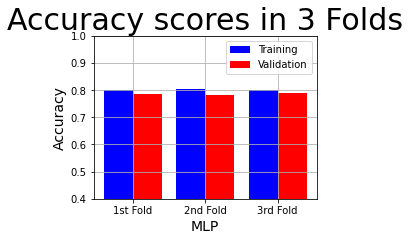

In [16]:
# Plot Accuracy Result
model_name = "MLP"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            mlp_results["Training Accuracy scores"],
            mlp_results["Validation Accuracy scores"])

In [17]:
# Calculatin the MSE and accuracy in the training and test

# Train
y_train_predict = classifier.predict(x_train)
y_train_true = y_train
# MSE
mse_train = mean_squared_error(y_train_true, y_train_predict)
print(f'MSE Train: {mse_train}')
# Accuracy
acc_train = accuracy_score(y_train_true, y_train_predict, normalize=True)
print(f'Accuracy Train: {acc_train}')

# Test
y_test_predict = classifier.predict(x_test)
y_test_true = y_test
# MSE
mse_test = mean_squared_error(y_test_true, y_test_predict)
print(f'MSE Test: {mse_test}')
# Accuracy
acc_test = accuracy_score(y_test_true, y_test_predict, normalize=True)
print(f'Accuracy Test: {acc_test}')


MSE Train: 0.20239302372743864
Accuracy Train: 0.7976069762725614
MSE Test: 0.20265151515151514
Accuracy Test: 0.7973484848484849


### **Exporting the model**
****

In [18]:
# Storing the model
if smote:
    dump(classifier, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/mlp/mlp_model_smote.joblib")
else:    
    dump(classifier, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/mlp/mlp_model.joblib")